In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def compute_action_value(state, action, v):
    summe = -2*abs(action)
    state[0] -= action
    state[1] += action
    z = 10
    for i in range(int(state[0]+1)):
        for j in range(int(state[1]+1)):
            for k in range(z):
                for l in range(z):
                    prob = compute_exp_probs(i, 3) * compute_exp_probs(j,4)*compute_exp_probs(k,3)\
                        * compute_exp_probs(l,2)
                    summe += prob * ((i+j)*10 + 0.9*v[int(min(state[0]-i+k,20)), int(min(state[1]-j+l,20))])
    return summe

def compute_exp_probs(n, l):
    return l**n / np.math.factorial(n) * np.exp(-l)

def compute_max_action(i, j, v):
    max_action = 0
    max_value = 0
    for k in range(max(-j, -5), min(i,5)+1):
        tmp = compute_action_value([i,j], k, v)
        if tmp > max_value:
            max_value = tmp
            max_action = k
    return max_action

In [33]:
def policy_iteration():
    v = np.zeros((21,21))
    p = np.zeros((21,21))
    unstable = True
    while unstable:
        plt.imshow(p, cmap='hot', interpolation='nearest')
        plt.show()
        print('new cycle')
        v = policy_evaluation(v, p)
        print('after policy evaluation')
        p, unstable = policy_improvement(v, p)
    return v, p

def policy_improvement(v, p):
    unstable = False
    for i in range(21):
        for j in range(21):
            p_old = p[i,j]
            p[i,j] = compute_max_action(i, j, v)
            if p_old != p[i,j]:
                unstable = True
    return p, unstable

def policy_evaluation(v, p):
    delta = 2
    while delta > 10**-1:
        print('Delta is:', delta)
        delta = 0
        for i in range(21):
            for j in range(21):
                old_value = v[i,j]
                v[i,j] = compute_action_value([i,j], p[i,j], v)
                delta = max(delta, abs(old_value-v[i,j]))
        
    return v

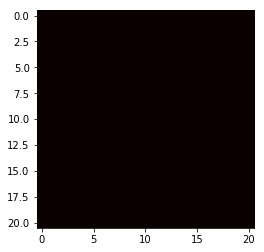

new cycle
Delta is: 2
Delta is: 188.6437855155624
Delta is: 125.03153493985806
Delta is: 74.98685750527378
Delta is: 44.72126450999582
Delta is: 24.929439842571355
Delta is: 12.994214608673019
Delta is: 6.420390348236992
Delta is: 3.041088061887592
Delta is: 1.390030308157975
Delta is: 0.619253212167564
Delta is: 0.26930110516514105
Delta is: 0.1155801774353904
after policy evaluation


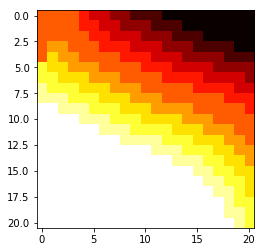

new cycle
Delta is: 2
Delta is: 243.31975099324399
Delta is: 25.46480112077228
Delta is: 15.94201609002937
Delta is: 11.192097077630422
Delta is: 6.916540824294771
Delta is: 4.186320914143664
Delta is: 2.4963124699172
Delta is: 1.472154489318541
Delta is: 0.8521944337703644
Delta is: 0.48588202569521854
Delta is: 0.27394362147231277
Delta is: 0.15316964646490305
after policy evaluation


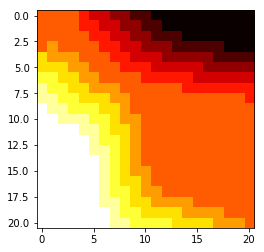

new cycle
Delta is: 2
Delta is: 14.948462944419646
Delta is: 7.810030282064702
Delta is: 4.30811069961743
Delta is: 2.5303323248139122
Delta is: 1.4992372572343697
Delta is: 0.882525670192706
Delta is: 0.514155347480937
Delta is: 0.2969350322464379
Delta is: 0.17023489906756595
after policy evaluation


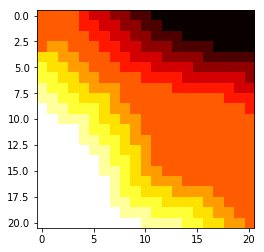

new cycle
Delta is: 2
Delta is: 0.9552646093717954
Delta is: 0.30266709916134005
Delta is: 0.16632341356188363
after policy evaluation


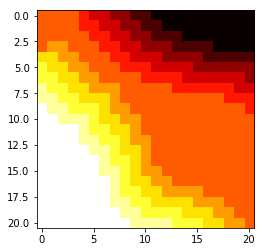

new cycle
Delta is: 2
after policy evaluation


In [34]:
v, p = policy_iteration()

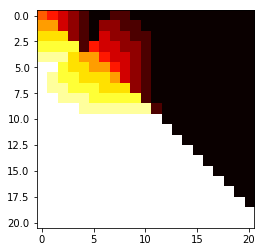

In [13]:
plt.imshow(p, cmap='hot', interpolation='nearest')
plt.show()

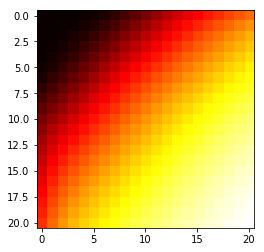

In [35]:
plt.imshow(v, cmap='hot', interpolation='nearest')
plt.show()

In [31]:
p[0,20]

-5.0